##1.Pick one use case (defined below).

Predict stock market price for TESLA. I want you to make a prediction algorithm which predicts the price of this stock on a    specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the  prediction percentage score. Data file: TESLA.csv For updated csv file, please download the data from:         https://finance.yahoo.com/quote/TSLA/history?p=TSLA

##2.Explore and research which algorithm would work best for this use case (regression or classification)

Regression algorithms are mainly used to predict continuous valus such as price, salary, age, and classification algorithms is commonly used to  predict or classify discrete values such as true or false,  spam or not spam etc.


With this in mind, i think it's a nobrainer to go for a regression algorithm for this problem. 

Although, on page 14 of the 'MachineLearning-p3' powerpoint, it says that we should use a classification algorithm for stock market predictions. 


##3.Document your findings in a file (3-5 lines) on why you chose this algorithm.

This project is build on a recurrent neural network, witch


##4.Train the algorithm using Python


##5.Keep the solution as simple as possible. We are not looking for the best machine learning algorithm. We are interested in seeing that you know how to work with machine learning.


##6.Publish the code on GitHub and send us the link



In [138]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler as mms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [139]:
#First i save the url as a variable
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv'

#Reading the csv from the URL given above and telling python that the separator/delimiter is ','
df = pd.read_csv(url, sep=',')

#Showing the table
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


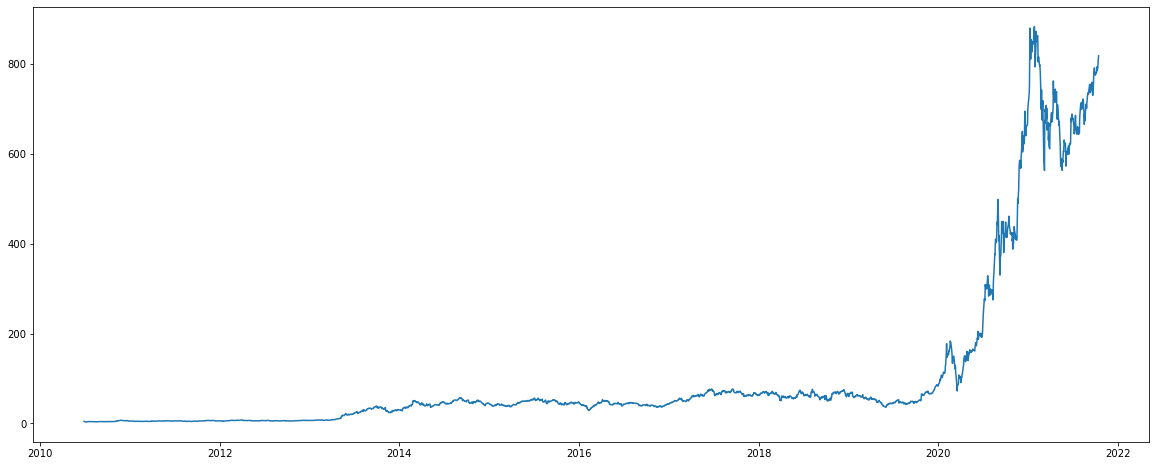

In [140]:
#Setting index as date

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#Ploting the closing prices
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label = 'Close price history')

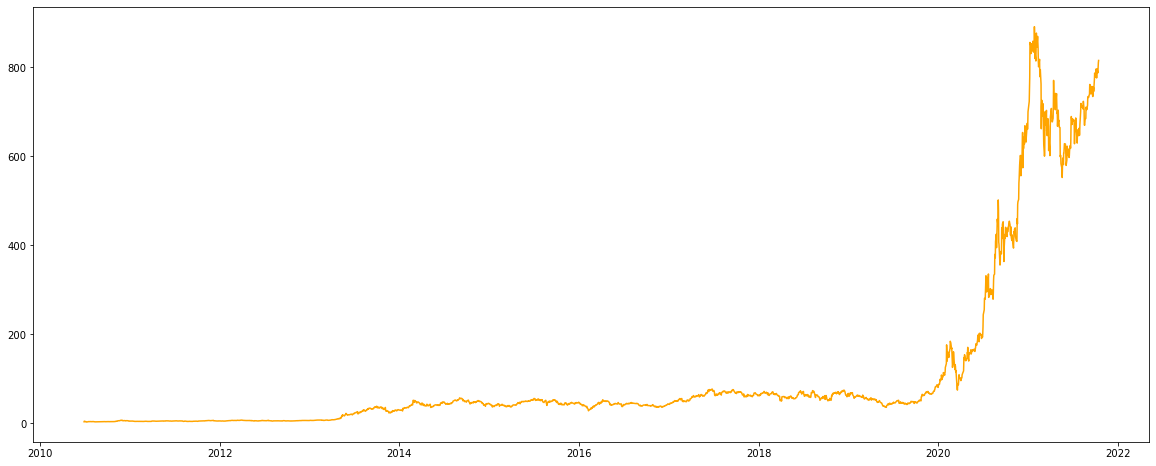

In [141]:
#Ploting the opening prices
plt.figure(figsize=(20,8))
plt.plot(df['Open'], color="orange", label = 'Open price history')

#This is probably unnessesary

In [142]:
#Preparing the data with a scaler from the 'sklearn' library

scaler = mms(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 90

#Preparing two empty arrays

x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0 ])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [143]:
#Building a model from the 'tensorflow' library
model = Sequential()

#Adding layers to the model
#LSTM (Long short-term memory) is an artifcial rcurrent neural network (RNN) architecture mostly used in deep learning.
#It will choose different implementations to maximize the performance
model.add(LSTM(units=50, return_sequences = True, input_shape =(x_train.shape[1], 1)))
#The dropout layer randomly sets input units to 0 with a frequency of rate at each step during trainig time, which helps prevent overfitting.
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Prediction of the next closing value
#Dense is used to create fully connected layers, in which every depends on every input.  
model.add(Dense(units=1))

#The 'Adam' optimizer is an efficent stocastic optimizer developed by OpenAI
#https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
#The 'loss-funtion':
#Computes the mean of squares of errors between labels and predictions.
model.compile(optimizer='adam', loss='mean_squared_error')


#Alter 'epcohs' (i.e. 25, 50, 100) for more accurate predictions
#Note: the higher the value of 'epochs' the longer it takes to train the model, but the more acurate the predictions will be
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
87/87 [==============================] - 10s 61ms/step - loss: 0.0072
Epoch 2/25
87/87 [==============================] - 5s 61ms/step - loss: 0.0014
Epoch 3/25
87/87 [==============================] - 5s 62ms/step - loss: 0.0015
Epoch 4/25
87/87 [==============================] - 6s 63ms/step - loss: 0.0016
Epoch 5/25
87/87 [==============================] - 6s 64ms/step - loss: 0.0011
Epoch 6/25
87/87 [==============================] - 5s 63ms/step - loss: 9.8142e-04
Epoch 7/25
87/87 [==============================] - 5s 60ms/step - loss: 0.0013
Epoch 8/25
87/87 [==============================] - 5s 60ms/step - loss: 0.0014
Epoch 9/25
87/87 [==============================] - 5s 60ms/step - loss: 9.0975e-04
Epoch 10/25
87/87 [==============================] - 5s 61ms/step - loss: 8.6148e-04
Epoch 11/25
87/87 [==============================] - 5s 60ms/step - loss: 8.1940e-04
Epoch 12/25
87/87 [==============================] - 5s 60ms/step - loss: 8.7246e-04
Epoch 13/25
87/8

In [144]:
#Loading test data
test_data = df
#Loading the actual closinig prices
actual_prices = test_data['Close'].values

#Using the pandas lib to concatinate the two lists 'df' and 'test_data'
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

#Preparing the inputs 
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

#Making predictions on test data
x_test = []

for x in range(prediction_days, len(model_inputs + 50)):
    x_test.append(model_inputs[x - prediction_days : x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


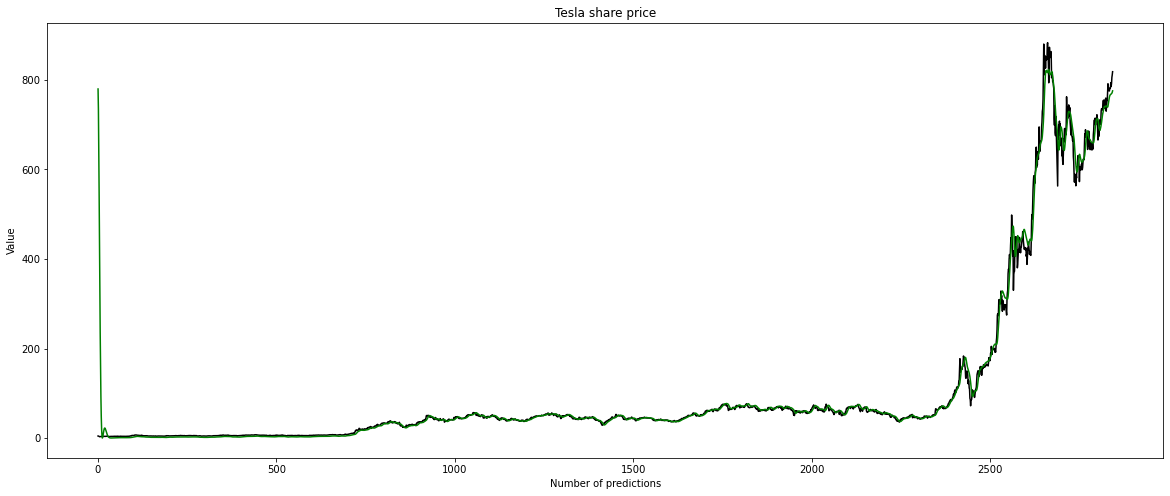

In [157]:
#Ploting the predictions

plt.figure(figsize=(20,8))
plt.title("Tesla share price")
plt.xlabel("Number of predictions")
plt.ylabel("Value")
plt.plot(actual_prices, color="black", label="Actual stock price")
plt.plot(predicted_prices, color="green", label = "Predicted stock prices")

#Alter 'epcohs' (i.e. 25, 50, 100) for more accurate predictions

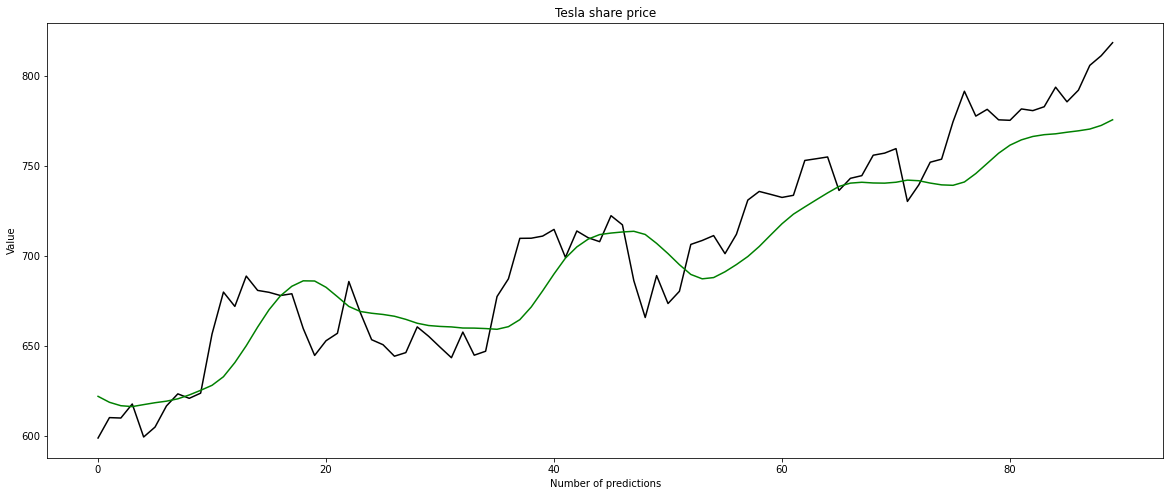

In [156]:
#Scaling down to the last 90 days for a more clear read
#NB! This graph will be altered if 'prediction_days' is altered

plt.figure(figsize=(20,8))
plt.title("Tesla share price")
plt.xlabel("Number of predictions")
plt.ylabel("Value")
plt.plot(actual_prices[len(actual_prices)-prediction_days:len(actual_prices)], color="black", label="Actual stock price")
plt.plot(predicted_prices[len(predicted_prices)-prediction_days:len(predicted_prices)], color="green", label = "Predicted stock prices")

In [152]:
#Predicting the next day
x = 1

real_data = [model_inputs[len(model_inputs) + x - prediction_days:len(model_inputs + x), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction) 
    
values = np.append(values, prediction)
    

print("The next day's predicted value is:" ,prediction)
    


The next day's predicted value is: [[779.7145]]


In [105]:
correct_predictions = 0
incorrect_predictions = 0


for i in range (len(x_test)):
    if actual_prices[i] - 1.5 < predicted_prices[i] and predicted_prices[i] < actual_prices[i] + 1.5:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print('Total predictions: ', len(x_test))
print('Number of correct predictions: ', correct_predictions)
print('Number of incorrect predictions: ', incorrect_predictions)
#Printing an empty linie
print()

#Calculating percentage of correct predictions
percent = (correct_predictions / len(x_test)) * 100
#Formating the percentage to two decimals
format_percent = "{:.2f}".format(percent)
print('Percentage of correct predictions: ', format_percent, "%")

#Calculating percentage of incorrect predictions
off_percent = (incorrect_predictions / len(x_test) * 100) 
#Formating the percentage to two decimals
format_offpercent = "{:.2f}".format(off_percent)
print('Percentage of incorrect predictions: ', format_offpercent, "%")

Total predictions:  2845
Number of correct predictions:  286
Number of incorrect predictions:  2559

Percentage of correct predictions:  10.05 %
Percentage of incorrect predictions:  89.95 %


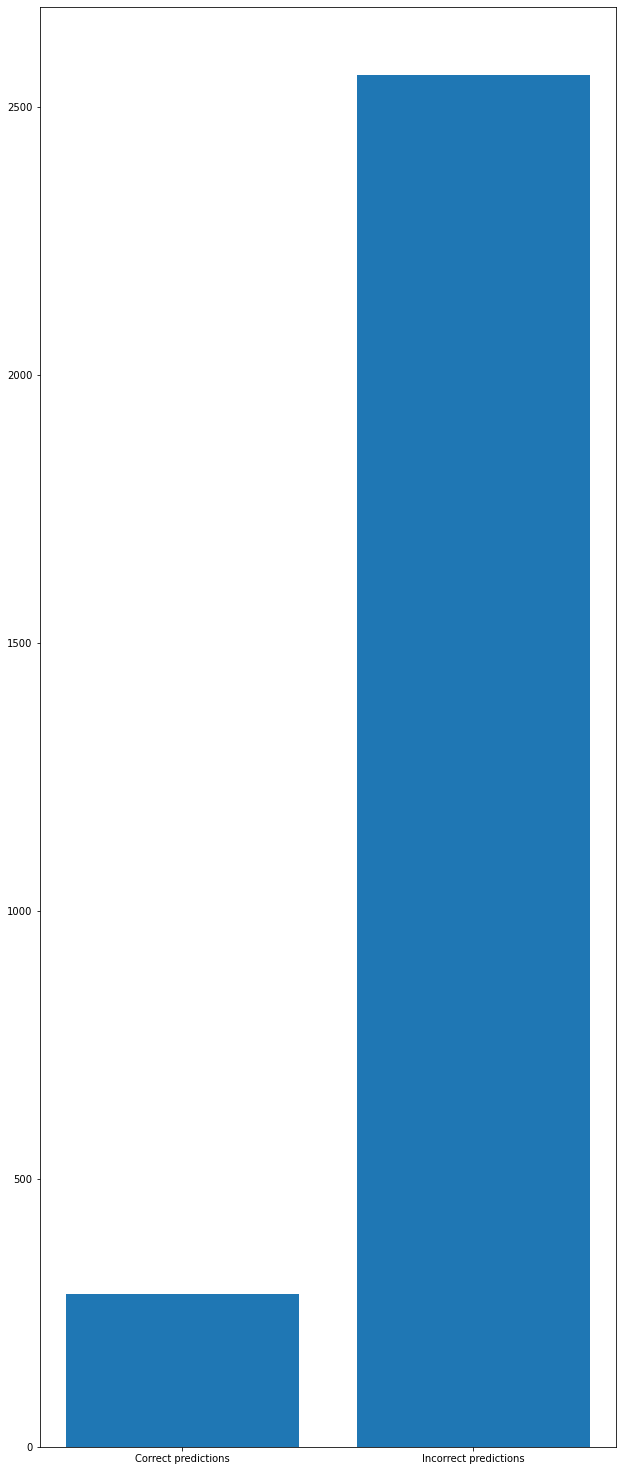

In [170]:
#Plotting the numbers

figure = plt.figure(figsize=(8,10))
axis = figure.add_axes([0,4,1,2])
names = ['Correct predictions', 'Incorrect predictions']
numbers = [correct_predictions, incorrect_predictions]
axis.bar(names, numbers)
plt.show()
